# Cleaning the data

---


## SPSS to CSV
We do this in RStudio, using the following script:

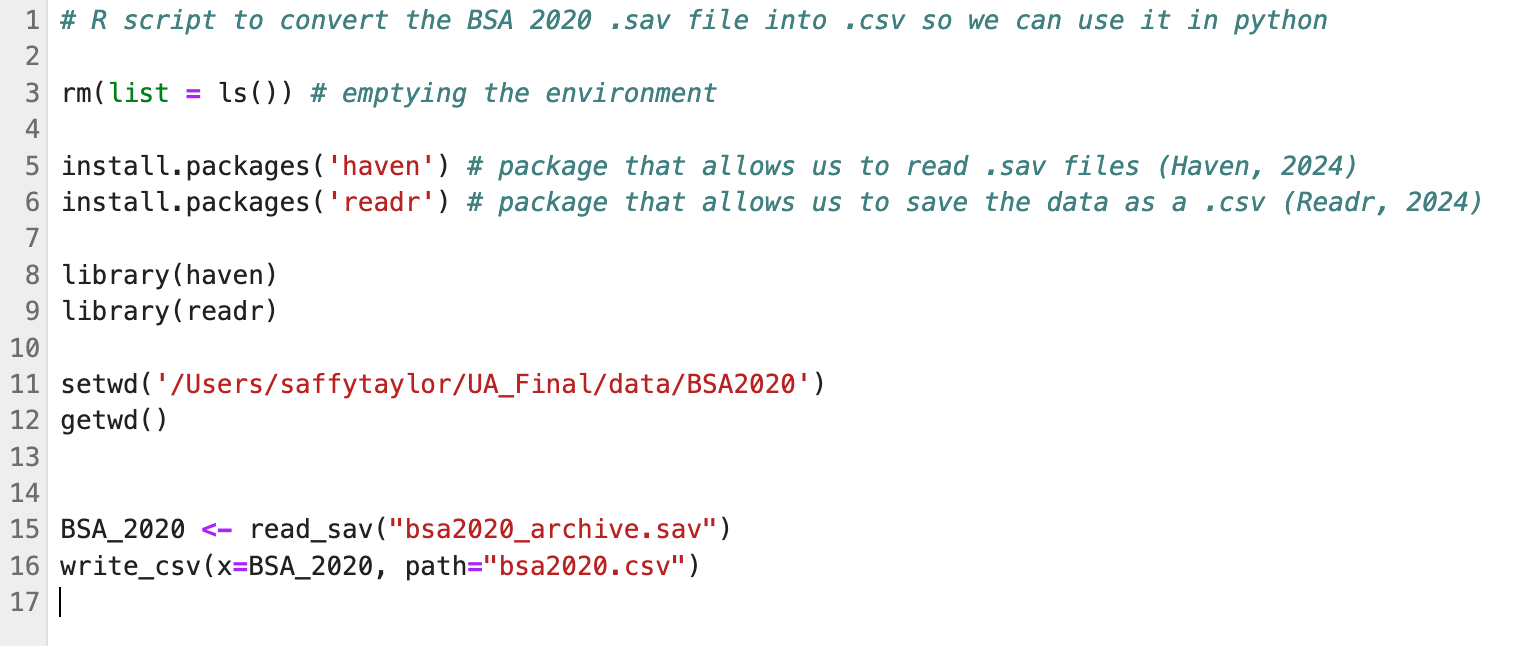

## Cleaning for Spatial microsimulation

### Step 1: Importing in the necessary packages

In [1]:
import pandas as pd

### Step 2: Reading in the CSV we made in RStudio

In [2]:
csv_path = "data/BSA2020/bsa2020.csv"
BSA_2020 = pd.read_csv(csv_path, low_memory=False)

In [3]:
BSA_2020.head() # checking our data

,serial,QnrVersion,RespSx2cat,RespAgeE,MarStat6,REconFW01,REconFW02,REconFW03,REconFW04,REconFW05,...,BestNatU2,RetirAg3,ReligSum20,RlFamSum20,EmplStatDV,RClassGP,serialh,GOR,gor2,BSA20_wt_new
0,3211000021,1,2,70,5,0,0,0,0,0,...,1,65.0,3,1.0,4.0,1,321100002,1,1,0.709986
1,3211000141,1,2,66,1,0,0,0,0,0,...,3,58.0,5,2.0,6.0,1,321100014,1,1,0.314587
2,3211000142,1,1,64,1,0,0,0,0,0,...,1,54.0,5,1.0,7.0,1,321100014,1,1,0.564962
3,3211000401,1,2,43,1,0,0,1,0,0,...,1,NaN,3,2.0,4.0,1,321100040,1,1,0.935545
4,3211000402,1,1,38,1,0,0,1,0,0,...,2,NaN,5,3.0,7.0,2,321100040,1,1,0.683079


In [4]:
BSA_2020.shape # checking the shape of the dataframe - it's all looking good

(3964, 210)

### Step 3: Subsetting
To be able to create a synthetic population of York, we only want data entries from Yorkshire and Humberside, and we do not need all of these columns, so we will subset for just what we are after.

In [5]:
# subsetting for just the Yorkshire and Humberside = indicated with by the value of GOR being 3
yorkshire_bsa = BSA_2020.loc[(BSA_2020.GOR == 3)]

In [6]:
yorkshire_bsa.shape # that's cut our sample down nicely

(340, 210)

In [7]:
# subsetting to only include a fraction of the columns available
keep_columns = ['RespAgeE', # age a last birthday, capped at 80+
                'RespSx2cat', # respondants sex
                'REconSum20', # economic activity
                'SupParty', # do they support a party
                'PARTYFW', # which party do they follow
                'Politics', # do they have an interest in politics
                'welfgrp', # opinions on the welfare system
                'Redistrb', # pro wealth redistribution?
                'leftrigh', # left or right leaning (scaled)
                'leftrig2', # left or right leaning (grouped)
                'libauth', # liberal vs authoritarian (scaled)
                'libauth2', # liberal vs authoritarian (grouped)
                'ReligSum20', # do they follow a religion
                'BestNatU2', # what nationality best describes them
                'RaceOri4', # what race best describes them
                'DisActDV', # do they have a long-term condition or disability
                'Voted', # did they vote in the last general election
                'Vote', # who did they vote for in the last general election
               ]

In [8]:
# creating a function to subset columns
def subset_dataframe(dataframe, keep_columns):
    subset_bsa = pd.DataFrame() # initialises a new results dataframe
    for x in keep_columns: # for loop add columns to new dataframe
        subset_bsa[x] = dataframe[x]
        
    return subset_bsa # returns the new dataframe

In [9]:
subset_bsa = subset_dataframe(yorkshire_bsa, keep_columns)

In [10]:
subset_bsa.shape # we've subset down to a total of 18 columns!

(340, 18)

Now we have a nice little subset, we'll export that as a CSV so we don't have to run any of this code again

In [ ]:
subset_bsa.to_csv("data/BSA2020/subset4_regional_bsa_data.csv", index=False)

### Step 4: Cleaning the new CSV
we don't want to have to have any NaN values so we will clean this dataset to ensure that we remove rows with missing entries so we have a complete dataset to work with.

In [11]:
# reading back in the CSV so we don't have to rerun all the steps above
csv_path_2 = "data/BSA2020/subset4_regional_bsa_data.csv"
subset_bsa_cleaning = pd.read_csv(csv_path_2, low_memory=False)

In [12]:
subset_bsa_cleaning.head() # from just checking the head we can already see columns with NaN values

,RespAgeE,RespSx2cat,REconSum20,SupParty,PARTYFW,Politics,welfgrp,Redistrb,leftrigh,leftrig2,libauth,libauth2,ReligSum20,BestNatU2,RaceOri4,DisActDV,Voted,Vote
0,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0
1,70,1,6,1,2.0,1,1,1,1.2,1,2.166667,1,3,1,3.0,2,1,2.0
2,67,1,2,2,1.0,3,2,4,2.6,2,3.500000,2,3,6,3.0,2,1,1.0
3,56,2,2,1,1.0,1,2,3,4.0,3,4.166667,3,1,1,3.0,3,1,1.0
4,24,1,2,1,2.0,3,1,3,2.2,1,2.333333,1,3,1,3.0,3,1,2.0


In [13]:
subset_bsa_cleaning.shape

(340, 18)

In [14]:
bsa_cleaned = subset_bsa_cleaning.dropna() # this gives us a cleaned dataset with no NAs

In [15]:
# resetting the index of this data
bsa_cleaned.reset_index()

,index,RespAgeE,RespSx2cat,REconSum20,SupParty,PARTYFW,Politics,welfgrp,Redistrb,leftrigh,leftrig2,libauth,libauth2,ReligSum20,BestNatU2,RaceOri4,DisActDV,Voted,Vote
0,0,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0
1,1,70,1,6,1,2.0,1,1,1,1.2,1,2.166667,1,3,1,3.0,2,1,2.0
2,2,67,1,2,2,1.0,3,2,4,2.6,2,3.500000,2,3,6,3.0,2,1,1.0
3,3,56,2,2,1,1.0,1,2,3,4.0,3,4.166667,3,1,1,3.0,3,1,1.0
4,4,24,1,2,1,2.0,3,1,3,2.2,1,2.333333,1,3,1,3.0,3,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,335,43,1,2,1,2.0,2,1,1,1.4,1,1.166667,1,5,1,3.0,3,1,2.0
272,336,26,1,2,2,2.0,3,1,2,1.8,1,2.833333,2,5,1,3.0,3,1,6.0
273,337,75,1,6,1,1.0,1,3,3,3.0,2,4.000000,3,1,2,3.0,3,1,1.0
274,338,42,1,7,1,6.0,3,2,2,2.4,1,2.833333,2,5,2,3.0,3,1,6.0


Next we'll rename some of the columns to more descriptive names just to help for analysis later on

In [16]:
bsa_cleaned.columns

Index(['RespAgeE', 'RespSx2cat', 'REconSum20', 'SupParty', 'PARTYFW',
       'Politics', 'welfgrp', 'Redistrb', 'leftrigh', 'leftrig2', 'libauth',
       'libauth2', 'ReligSum20', 'BestNatU2', 'RaceOri4', 'DisActDV', 'Voted',
       'Vote'],
      dtype='object')

In [19]:
bsa_cleaned.shape

(276, 18)

In [17]:
new_names = {
    'RespAgeE': 'age', # age of respondant at last birthday (capped at 80)
    'RespSx2cat': 'sex', # sex of respondant
    'REconSum20': 'economic', # economic activity of respondent
    'SupParty': 'partySup', # does respondent support a particular party
    'PARTYFW': 'partySupWho', # which party do they support (if they had to choose on day of survey)
    'Politics': 'polInterest', # do they have an interest in politics
    'welfgrp': 'welfare', # opinions on the welfare system
    'Redistrb': 'redistrb', # pro wealth redistribution?
    'leftrigh': 'leftright', # left or right leaning (scaled)
    'leftrig2': 'leftright2', # left or right leaning (grouped)
    'libauth': 'libauth', # liberal vs authoritarian (scaled)
    'libauth2': 'libauth2', # liberal vs authoritarian (grouped)
    'ReligSum20': 'religion', # what religion do they follow
    'BestNatU2': 'nationality', # what nationality best describes them
    'RaceOri4': 'raceOrigin', # which racial group do they best identify with
    'DisActDV': 'disability', # do they have a long-term condition or disability
    'Voted': 'voteAct', # did they vote in the last general election
    'Vote': 'voteParty', # who did they vote for in the last general election
}

bsa_cleaned = bsa_cleaned.rename(columns=new_names)

In [18]:
bsa_cleaned.head() # looking beautiful and easy to interpret!

,age,sex,economic,partySup,partySupWho,polInterest,welfare,redistrb,leftright,leftright2,libauth,libauth2,religion,nationality,raceOrigin,disability,voteAct,voteParty
0,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0
1,70,1,6,1,2.0,1,1,1,1.2,1,2.166667,1,3,1,3.0,2,1,2.0
2,67,1,2,2,1.0,3,2,4,2.6,2,3.500000,2,3,6,3.0,2,1,1.0
3,56,2,2,1,1.0,1,2,3,4.0,3,4.166667,3,1,1,3.0,3,1,1.0
4,24,1,2,1,2.0,3,1,3,2.2,1,2.333333,1,3,1,3.0,3,1,2.0


In [20]:
# adding an id column quickly!
bsa_cleaned.insert(0, 'id', range(1000, 1000 + len(bsa_cleaned)))
bsa_cleaned.head()

,id,age,sex,economic,partySup,partySupWho,polInterest,welfare,redistrb,leftright,leftright2,libauth,libauth2,religion,nationality,raceOrigin,disability,voteAct,voteParty
0,1000,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0
1,1001,70,1,6,1,2.0,1,1,1,1.2,1,2.166667,1,3,1,3.0,2,1,2.0
2,1002,67,1,2,2,1.0,3,2,4,2.6,2,3.500000,2,3,6,3.0,2,1,1.0
3,1003,56,2,2,1,1.0,1,2,3,4.0,3,4.166667,3,1,1,3.0,3,1,1.0
4,1004,24,1,2,1,2.0,3,1,3,2.2,1,2.333333,1,3,1,3.0,3,1,2.0


In [21]:
# dropping individuals who refused to answer what age they are
bsa_cleaned['age'].unique()
bsa_cleaned = bsa_cleaned.drop(bsa_cleaned[bsa_cleaned['age'] == 999].index)

In [23]:
bsa_cleaned.shape

(275, 19)

In [ ]:
bsa_cleaned.to_csv("data/BSA2020/final_bsa_cleaned.csv", index=False)

---


## Cleaning for Geodemographics

To be able to carry out a geodemographic clustering, our data needs to be in the form of aggregate counts per zone. At the moment each row represents an individual in York. We need each row to represent a zone.

### Step 1: Import the necessary packages

In [24]:
import pandas as pd

### Step 2: Reading in the individual level data 

In [25]:
york_BSA = pd.read_csv('data/BSA_synthetics_geo.csv', low_memory=False)

In [26]:
york_BSA

,id,age,sex,economic,partySup,partySupWho,polInterest,welfare,redistrb,leftright,leftright2,libauth,libauth2,religion,nationality,raceOrigin,disability,voteAct,voteParty,geo_code
0,1000,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0,E05001745
1,1000,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0,E05001745
2,1000,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0,E05001745
3,1000,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0,E05001745
4,1000,27,2,2,1,1.0,3,3,5,3.8,3,4.500000,3,5,1,3.0,3,1,1.0,E05001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162091,1275,50,2,2,2,7.0,4,2,1,1.0,1,4.833333,3,5,2,3.0,3,1,7.0,E05001766
162092,1275,50,2,2,2,7.0,4,2,1,1.0,1,4.833333,3,5,2,3.0,3,1,7.0,E05001766
162093,1275,50,2,2,2,7.0,4,2,1,1.0,1,4.833333,3,5,2,3.0,3,1,7.0,E05001766
162094,1275,50,2,2,2,7.0,4,2,1,1.0,1,4.833333,3,5,2,3.0,3,1,7.0,E05001766


### Step 3: Creating a new database of aggregate counts
After exploring a few options on how best to transform the dataset, I decided that the best method was to flatten the dataset according to the columns I wanted, to then be able to sum the rows and save them into a new aggregate database.

In [ ]:
# this created a new dataframe where the first row is each of our electoral zone codes
BSA_zones = pd.DataFrame({'geo_code': york_BSA['geo_code'].unique()})

In [ ]:
# Making the flattened dataframes to sum our aggregates from
age_flat = pd.pivot_table(york_BSA,columns=['age'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
sex_flat = pd.pivot_table(york_BSA,columns=['sex'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
partySup_flat = pd.pivot_table(york_BSA,columns=['partySup'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
partySupWho_flat = pd.pivot_table(york_BSA,columns=['partySupWho'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
polInterest_flat = pd.pivot_table(york_BSA,columns=['polInterest'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
welfare_flat = pd.pivot_table(york_BSA,columns=['welfare'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
redistrb_flat = pd.pivot_table(york_BSA,columns=['redistrb'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
leftright2_flat = pd.pivot_table(york_BSA,columns=['leftright2'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
libauth2_flat = pd.pivot_table(york_BSA,columns=['libauth2'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
welfare_flat = pd.pivot_table(york_BSA,columns=['welfare'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
redistrb_flat = pd.pivot_table(york_BSA,columns=['redistrb'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
voteParty_flat = pd.pivot_table(york_BSA,columns=['voteParty'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
religion_flat = pd.pivot_table(york_BSA,columns=['religion'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
nationality_flat = pd.pivot_table(york_BSA,columns=['nationality'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
raceOrigin_flat = pd.pivot_table(york_BSA,columns=['raceOrigin'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)
disability_flat = pd.pivot_table(york_BSA,columns=['disability'],values='id', index='geo_code', aggfunc=len, fill_value=0, observed=False)

Now we've got flatten datasets pivoted so that our index rows are geo_codes, we can use this to calculate our aggregate data into new columns and put them in our new dataset!

The follow cell could have likely been made to be more efficient using functions, however as the groupings changed depending on the category, doing it individually felt like the least time-consuming option so that we could move onto geodemographics. There is definitely room for improvement in this code.

In [ ]:
# general population aggregates
BSA_zones['total_pop'] = age_flat.sum(axis=1).tolist()
BSA_zones['age1864'] = age_flat.loc[:,'20':'64'].sum(axis=1).tolist()
BSA_zones['age65'] = age_flat.loc[:,'65':].sum(axis=1).tolist()
BSA_zones['female'] = sex_flat[1].tolist()
BSA_zones['male'] = sex_flat[2].tolist()

# do they support a particular party
BSA_zones['support_yes'] = partySup_flat[1].tolist()
BSA_zones['support_no'] = partySup_flat[2].tolist()
#BSA_zones['support_no_response'] = partySup_flat[9].tolist() for some reason it does not like this line or any other DNR
partySup_DNR_list = partySup_flat[9].tolist()
BSA_zones['support_DNR'] = partySup_DNR_list

# who do they support?
BSA_zones['support_conservative'] = partySupWho_flat[1].tolist()
BSA_zones['support_labour'] = partySupWho_flat[2].tolist()
BSA_zones['support_libdem'] = partySupWho_flat[3].tolist()
BSA_zones['support_green'] = partySupWho_flat[6].tolist()
BSA_zones['support_ukip'] = partySupWho_flat[7].tolist()
BSA_zones['support_brexit'] = partySupWho_flat[8].tolist()
BSA_zones['support_other'] = partySupWho_flat[9].tolist()
BSA_zones['support_none'] = partySupWho_flat[10].tolist()
support_no_response_list = partySupWho_flat.loc[:,'98':].sum(axis=1).tolist()
BSA_zones['support_no_response'] = support_no_response_list

# are they interested in politics?
BSA_zones['political_interest_yes'] = polInterest_flat.loc[:,'1':'3'].sum(axis=1).tolist()
BSA_zones['political_interest_no'] = polInterest_flat.loc[:,'4':'5'].sum(axis=1).tolist()

# opinions on welfare?
BSA_zones['welfare_pro'] = welfare_flat[1].tolist()
BSA_zones['welfare_anti'] = welfare_flat[3].tolist()
BSA_zones['welfare_middle'] = welfare_flat[2].tolist()
BSA_zones['welfare_no_response'] = welfare_flat[8].tolist()

# opinions on wealth redistribution
BSA_zones['wealth_redist_pro'] = redistrb_flat.loc[:,'1':'2'].sum(axis=1).tolist()
BSA_zones['wealth_redist_anti'] = redistrb_flat.loc[:,'4':'5'].sum(axis=1).tolist()
BSA_zones['wealth_redist_neither'] = redistrb_flat[3].tolist()

# left, right or centrist?
BSA_zones['lean_left'] = leftright2_flat[1].tolist()
BSA_zones['lean_right'] = leftright2_flat[3].tolist()
BSA_zones['lean_centrist'] = leftright2_flat[2].tolist()
BSA_zones['lean_no_response'] = leftright2_flat[8].tolist()

# libertarian or authoritarian
BSA_zones['libertarian'] = libauth2_flat[1].tolist()
BSA_zones['authoritarian'] = libauth2_flat[3].tolist()
BSA_zones['neither_lib_auth'] = libauth2_flat[2].tolist()

# what religion do they follow?
BSA_zones['rel_christian'] = religion_flat.loc[:,'1':'3'].sum(axis=1).tolist()
BSA_zones['rel_nonChristian'] = religion_flat[4].tolist()
BSA_zones['rel_none'] = religion_flat[5].tolist()
BSA_zones['rel_other'] = religion_flat[6].tolist()
BSA_zones['rel_no_response'] = religion_flat[9].tolist()

# what nationality do they best identify with?
BSA_zones['nat_british'] = nationality_flat[1].tolist()
BSA_zones['nat_english'] = nationality_flat[2].tolist()
BSA_zones['nat_european'] = nationality_flat[3].tolist()
BSA_zones['nat_irish'] = nationality_flat[4].tolist()
BSA_zones['nat_scottish'] = nationality_flat[6].tolist()
BSA_zones['nat_welsh'] = nationality_flat[8].tolist()
#BSA_zones['nat_other_none'] = nationality_flat.loc[:,'9':'10'].sum(axis=1).tolist() # doesn't like this line
# nat_other_none_list = nationality_flat.loc[:,'9':'10'].sum(axis=1).tolist() # doesn't like this line either

# solution was this!
list_nat1 = nationality_flat[9].tolist()
list_nat2 = nationality_flat[10].tolist()
list_nat3 = []
for i in range(0,len(list_nat1)):
    result = list_nat1[i]+list_nat2[i]
    list_nat3.append(result)
BSA_zones['nat_other_none'] = list_nat3

BSA_zones['nat_no_reponse'] = nationality_flat.loc[:,'98':].sum(axis=1).tolist()

# what's the racial origin they best identify with?
BSA_zones['race_asian'] = raceOrigin_flat[2.0].tolist()
BSA_zones['race_white'] = raceOrigin_flat[3.0].tolist()
BSA_zones['race_mixed'] = raceOrigin_flat[4.0].tolist()
BSA_zones['race_other'] = raceOrigin_flat[5.0].tolist()
BSA_zones['race_no_response'] = raceOrigin_flat.loc[:,'8.0':].sum(axis=1).tolist()

# do they have a disability that affects their daily life
BSA_zones['disab_affect'] = disability_flat[1].tolist()
BSA_zones['disab_no_affect'] = disability_flat[2].tolist()
BSA_zones['disab_none'] = disability_flat[3].tolist()
BSA_zones['disab_no_response'] = disability_flat[4].tolist()

# who did they vote for in the last general election
BSA_zones['voted_conservative'] = voteParty_flat[1].tolist()
BSA_zones['voted_labour'] = voteParty_flat[2].tolist()
BSA_zones['voted_libdem'] = voteParty_flat[3].tolist()
BSA_zones['voted_green'] = voteParty_flat[6].tolist()
BSA_zones['voted_UKIP'] = voteParty_flat[7].tolist()
BSA_zones['voted_other'] = voteParty_flat[8].tolist()
BSA_zones['voted_no_reponse'] = voteParty_flat.loc[:,'98':].sum(axis=1).tolist()


In [ ]:
BSA_zones

### Step 4: Validation and checking the data to ensure we've aggregated it correctly 

To ensure that we've aggregate and seperated the populations up correctly, we'll sum up each of our categorisations to ensure that it does represent York's population.

In [ ]:
york_pop = []
york_pop.append(BSA_zones['total_pop'].sum(axis=0))
york_pop.append(BSA_zones.loc[:,'age1864':'age65'].sum().sum())
york_pop.append(BSA_zones.loc[:,'female':'male'].sum().sum())
york_pop.append(BSA_zones.loc[:,'support_yes':'support_DNR'].sum().sum())
york_pop.append(BSA_zones.loc[:,'support_conservative':'support_no_response'].sum().sum())
york_pop.append(BSA_zones.loc[:,'political_interest_yes':'political_interest_no'].sum().sum())
york_pop.append(BSA_zones.loc[:,'welfare_pro':'welfare_no_response'].sum().sum())
york_pop.append(BSA_zones.loc[:,'wealth_redist_pro':'wealth_redist_neither'].sum().sum())
york_pop.append(BSA_zones.loc[:,'lean_left':'lean_no_response'].sum().sum())
york_pop.append(BSA_zones.loc[:,'libertarian':'neither_lib_auth'].sum().sum())
york_pop.append(BSA_zones.loc[:,'rel_christian':'rel_no_response'].sum().sum())
york_pop.append(BSA_zones.loc[:,'nat_british':'nat_no_reponse'].sum().sum()) # doesn't like this one
york_pop.append(BSA_zones.loc[:,'race_asian':'race_no_response'].sum().sum())
york_pop.append(BSA_zones.loc[:,'disab_affect':'disab_no_response'].sum().sum())
york_pop.append(BSA_zones.loc[:,'voted_conservative':'voted_no_reponse'].sum().sum())

print(york_pop)

The list printed out above shows that the sums of the columns representing each category all add up to 162,096, which is our adult population of York! Therefore we can conclude the the data is aggregated correctly!

Finally, we will check for NaN values in our dataframe; luckily there aren't any!

In [ ]:
list(BSA_zones.isnull().any())

Whilst we do not need close to the number of columns we've created, it is a useful dataset to have and it can be used for other studies, and goes another step further to address the lack of data that this project seeks to aid. We'll save the aggregated dataframe as a CSV that can then be used for our geodemographics!

In [ ]:
BSA_zones.to_csv("data/BSA_agg.csv", index=False)